# 문서 유사도
- 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도를 사용함
- 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다, <span style = 'background-color: #ffdce0'><b>벡터의 상호 방향성이 얼마나 유사</b>한지에 기반함</span>
- 두 벡터 사잇각에 따라 유사도가 결정됨
    - 첫번째처럼 <span style = 'background-color: #fff5b1'>예각인 경우 유사</span>함
    - 두번째처럼 <span style = 'background-color: #fff5b1'>직각과 비슷한 경우 관련성이 없다</span>고 봄
    - 세번째처럼 <span style = 'background-color: #fff5b1'>둔각인 경우 반대 관계</span>라고 봄

<img src = "https://blog.kakaocdn.net/dn/bSSmNp/btqGX5T8tzh/AFZJyaKEcGiaUsM9H0uBX0/img.png" style = 'width:800px;'>

- 두 벡터 A, B 간 코사인 값은 다음의 식에서 변형되어 구할 수 있음
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F3TbCX%2FbtqBUzNabBD%2Fnrkaaa2IWwmTlgyiKryEC1%2Fimg.png' style = 'width:300px;'>

- 유사도 코사인 값:
<img src = 'https://blog.kakaocdn.net/dn/0pBN5/btqBW1nWMbL/E4Hh4JpyOqT3Opg4MhPa70/img.png' style = 'width:500px;'>

### 예시

#### 코사인 유사도 측정하는 사용자함수 생성

In [7]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product =  np.dot(v1, v2)
    l2_norm = np.sqrt((sum(np.square(v1)) * sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity


#### 피처 벡터화

In [3]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf 벡터화
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)

# 희소행렬로 반환
print(feature_vect_simple)

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


#### 문장 간 문서유사도 측정

##### 첫번째 문장 <-> 두번째문장

In [18]:
import numpy as np

# 반환된 희소행렬을 cos_similarity 함수를 적용하기 위해 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()
print(feature_vect_dense, '\n')

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
print(vect1, vect2, '\n')

# 사용자 함수 적용
similarity_simple = cos_similarity(vect1, vect2)
print(f'문장1, 문장2 간의 코사인 유사도: {np.round(similarity_simple, 3)}')

[[0.4155636  0.         0.4155636  0.         0.         0.
  0.24543856 0.         0.24543856 0.         0.         0.
  0.         0.4155636  0.24543856 0.49087711 0.         0.24543856]
 [0.         0.         0.         0.         0.         0.
  0.23402865 0.39624495 0.23402865 0.         0.3013545  0.
  0.39624495 0.         0.23402865 0.23402865 0.39624495 0.4680573 ]
 [0.         0.30985601 0.         0.30985601 0.30985601 0.30985601
  0.18300595 0.         0.18300595 0.30985601 0.23565348 0.30985601
  0.         0.         0.18300595 0.3660119  0.         0.3660119 ]] 

[0.4155636  0.         0.4155636  0.         0.         0.
 0.24543856 0.         0.24543856 0.         0.         0.
 0.         0.4155636  0.24543856 0.49087711 0.         0.24543856] [0.         0.         0.         0.         0.         0.
 0.23402865 0.39624495 0.23402865 0.         0.3013545  0.
 0.39624495 0.         0.23402865 0.23402865 0.39624495 0.4680573 ] 

문장1, 문장2 간의 코사인 유사도: 0.402


##### 첫번째문장 <-> 세번째문장

In [22]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
print(vect1, vect3, '\n')

similarity_simple = cos_similarity(vect1, vect3)
print(f'문장1, 문장3 간의 코사인 유사도: {np.round(similarity_simple, 3)}')

[0.4155636  0.         0.4155636  0.         0.         0.
 0.24543856 0.         0.24543856 0.         0.         0.
 0.         0.4155636  0.24543856 0.49087711 0.         0.24543856] [0.         0.30985601 0.         0.30985601 0.30985601 0.30985601
 0.18300595 0.         0.18300595 0.30985601 0.23565348 0.30985601
 0.         0.         0.18300595 0.3660119  0.         0.3660119 ] 

문장1, 문장3 간의 코사인 유사도: 0.404


##### 첫번째문장 <-> 세번째문장

In [23]:
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
print(vect2, vect3, '\n')

similarity_simple = cos_similarity(vect2, vect3)
print(f'문장2, 문장3 간의 코사인 유사도: {np.round(similarity_simple,3)}')

[0.         0.         0.         0.         0.         0.
 0.23402865 0.39624495 0.23402865 0.         0.3013545  0.
 0.39624495 0.         0.23402865 0.23402865 0.39624495 0.4680573 ] [0.         0.30985601 0.         0.30985601 0.30985601 0.30985601
 0.18300595 0.         0.18300595 0.30985601 0.23565348 0.30985601
 0.         0.         0.18300595 0.3660119  0.         0.3660119 ] 

문장2, 문장3 간의 코사인 유사도: 0.456


### 코사인 유사도 측정: 특정 문장과 여러 문장 간 
- sklearn에서 제공하는 cosine_similarity API는 <span style = 'background-color: #ffdce0'>희소행렬, 밀집행렬 모두 가능</span>함

In [28]:
from sklearn.metrics.pairwise import cosine_similarity 
import warnings
warnings.filterwarnings('ignore')

In [29]:
# 1_1. 희소행렬
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], 
                                           feature_vect_simple)

print(f'문장1과 전체 문장 간 코사인 유사도: \n{np.round(similarity_simple_pair,3)}')

문장1과 전체 문장 간 코사인 유사도: 
[[1.    0.402 0.404]]


In [31]:
# 1_2.희소행렬 전체 문장간 비교
similarity_simple_pair = cosine_similarity(feature_vect_simple, 
                                           feature_vect_simple)

print(f'전체 문장 간 코사인 유사도: \n{np.round(similarity_simple_pair,3)}')

전체 문장 간 코사인 유사도: 
[[1.    0.402 0.404]
 [0.402 1.    0.456]
 [0.404 0.456 1.   ]]


In [30]:
# 2. 밀집행렬
similarity_simple_pair = cosine_similarity(feature_vect_dense[0], 
                                           feature_vect_dense)

print(f'문장1과 전체 문장 간 코사인 유사도: \n{np.round(similarity_simple_pair,3)}')

문장1과 전체 문장 간 코사인 유사도: 
[[1.    0.402 0.404]]


### 실습: Opinion Review 데이터세트를 이용한 문서 유사도 측정

In [42]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

In [117]:
# 제거해야할 문장부호 딕셔너리화
## ord: 하나의 문자를 인자로 받고 해당 문자에 해당하는 유니코드 정수화
## string.punctuation: 따옴표,마침표 물음표 등의 문장부호
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)


# 입력으로 들어온 token 단어들에 대해 Lemmatization 어근 변환
def LemTokens(tokens):
    # 표제어 추출: 어간 추출과 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징임
    lemmar = WordNetLemmatizer()
    return [lemmar.lemmatize(token) for token in tokens]


# 입력으로 문장을 받아서 stop_word 제거(translate)-> 소문자 변환(lower) -> 단어 토큰화 -> lemmatization 어근 변환
## translate: 문자 변환 메서드
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [118]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 컬럼 내 내용이 긴 경우 글자가 나타나도록 설정
pd.set_option('display.max_colwidth', 700)

In [119]:
# 파일 경로 지정
path = r'OpinosisDataset1.0/topics'

# 모든 파일 앞에 경로 붙여주기
## glob.glob: 파라미터에 명시된 저장 경로와 패턴에 해당하는 파일명을 리스트 형식으로 반환
## os.path.join: 여러 개의 path를 인자로 받을 수 있으며, 아래와 같이 여러 path를 넘기면 그 패스를 모두 조합하여 하나의 path를 리턴
### 따라서, os.path.join으로 해당 패스 경로와 *data를 조합하고 해당 경로에 (임의의 어떤 문자)data로 끝나는 파일들의 리스트를 찾아서 리스트 형성함
all_files = glob.glob(os.path.join(path, "*.data"))
# print(all_files)


filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    
    # 파일 이름 리스트에 추가
    filename = file_.split('\\')[-1].split('.')[0]
    filename_list.append(filename)
    
    # 파일 하나당 전체 행의 내용을 문자화하고 의견 내용 리스트에 해당 내용 추가
    opinion_text.append(df.to_string())

# 전체 리뷰 데이터프레임 생성
document_df = pd.DataFrame({'filename': filename_list,
                            'opinion_text': opinion_text})
display(document_df)



# 피처 벡터화
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize,
                             stop_words = 'english',
                             ngram_range = (1,2),
                             min_df = 0.05,
                             max_df = 0.85)
## 학습/테스트를 나누는게 아니라 전체 데이터를 변형시키기 때문에 fit_transform 메서드 활용
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])



# 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)

## 군집화 레이블
cluster_label = km_cluster.labels_
## 군집화 중심점
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label

document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ..."
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ..."
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now..."
5,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ..."
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ..."
7,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ..."
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...
9,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ..."


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",2
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0


In [121]:
feature_vect.shape

(51, 4611)

#### 군집 레이블 확인

##### 군집0: 전자기기

In [101]:
document_df.loc[document_df['cluster_label'] == 0]

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
5,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
9,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
10,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",0
11,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
12,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0


##### 군집1: 자동차

In [102]:
document_df.loc[document_df['cluster_label'] == 1]

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",1
7,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",1
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,1
17,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,1
18,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",1
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",1
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",1
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,1
37,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",1
47,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",1


##### 군집2: 호텔

In [103]:
document_df.loc[document_df['cluster_label'] == 2]

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",2
13,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,2
14,food_swissotel_chicago,The food for our event was delicious .\n0 ...,2
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,2
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",2
21,location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",2
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,2
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",2
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",2
31,rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",2


#### 코사인 유사도 확인

In [125]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 2인 데이터는 호텔로 군집화된 데이터
## 데이터프레임에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label'] == 2].index

## 호텔로 군집화된 데이터 중 첫 번째 문서를 다른 문서와 비교하기 위해서 파일명 추출
coparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('군집의 총 호텔 리뷰 개수',len(hotel_indexes),'개', '\n')

print('''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
''')
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)
                

군집의 총 호텔 리뷰 개수 16 개 

document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정

[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


#### 문서유사도가 높은 순으로 시각화

In [108]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

가장 유사도가 큰 파일명 및 유사도:
 filename      room_holiday_inn_london
similarity                   0.514423
Name: 32, dtype: object


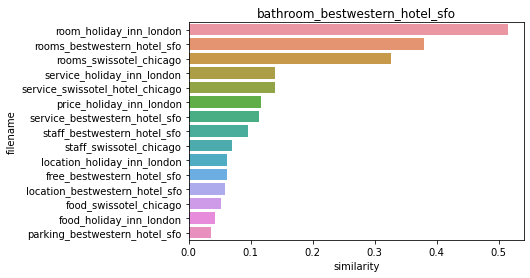

In [126]:
#첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(coparison_docname)
plt.show()
